# CS5901 - P2
### Stage 1. Data cleaning and profiling
1. Import the data as a pandas dataframe
2. Identify and remove any data rows that make no sense
3. Replace any missing values in T3 and T4 with average values for their specific level
4. Write code ‑ without using pandas.describe() ‑ that presents a table of descriptive statistics for each column, then compare you results to those obtained using pandas.describe()
5. Write code that identifies any repeated rows or confirms that there are none

### Overview of dataset

In [1]:
import pandas as pd
import numpy as np
import time
import gc
import psutil
import os
# Additional package
import sys
import random # Try to avoid

In [ ]:
df = pd.read_csv('P2data2799.csv', sep=r'\t', engine='python')

In [ ]:
print(df.info(), '\n')
print(df.shape)
df

In [ ]:
# Clean up columns headers
df = df.rename(columns={'"Level': 'Level'})
df = df.rename(columns={'T4adjusted"': 'T4adjusted'})
df.columns

### Data cleaning and converting data types

In [ ]:
# Remove quotes from the columns
df['Level'] = df['Level'].str.replace('"', '')
df['T4adjusted'] = df['T4adjusted'].str.replace('"', '')

# Replace blank values with np.nan
df['T4adjusted'] = df['T4adjusted'].replace('', np.nan)

In [ ]:
df.select_dtypes('object').columns

In [ ]:
# Convert Object dtypes into numeric
df['Level'] = df['Level'].astype('int')
df['T4adjusted'] = df['T4adjusted'].astype('float64')
df.dtypes

In [ ]:
# Check out unique and # unique values
for col in df.columns:
    print(f"\033[1m{col}\033[0m:")
    print('Dtype:', df[col].dtypes)
    print('Unique values:', df[col].unique()[:5])
    print('Number of Unique values:', df[col].nunique(), '\n')

### Handling missing values

In [ ]:
# Check out proportion of missing values
null_count = df.isnull().sum()
null_count_df = pd.DataFrame(null_count, columns=['null count'])
null_count_df['null count %'] = null_count_df['null count'] / len(null_count_df)
null_count_df['null count %'] = [f'{i}%' for i in null_count_df['null count %']]
null_count_df

In [ ]:
# Visualise proportion of missing values
plot_df = pd.DataFrame(null_count_df.index, columns=['variables'])
plot_df['null count'] = null_count_df['null count'].tolist()
plot_df.plot(kind='bar', x='variables', y='null count', figsize=(5,3))

In [ ]:
# Impute missing values with column average
df['T4'].fillna(df['T4'].mean(), inplace=True)
df['T3'].fillna(df['T3'].mean(), inplace=True)
df['T4adjusted'].fillna(df['T4adjusted'].mean(), inplace=True)
df['T3adjusted'].fillna(df['T3adjusted'].mean(), inplace=True)

# Confirm zero missing values
df.isnull().sum().sum()

### Duplicate rows
- All 3 method are showing the same results in that there are 21 pairs of duplicate rows
- For each pair of duplicate rows, a single row will be removed, so we are left with a dataset with all unique rows

In [ ]:
# Method 1 (unique key method/Excel inspired)
def find_duplicate_rows(df):
    
    # Create a unique key by concatenating the values for each row
    df['Unique_Key'] = df.apply(lambda row: '/'.join(row.astype(str)), axis=1)

    # Count the occurrences of each unique key
    key_counts = df['Unique_Key'].value_counts()

    # Select the rows with a count greater than 1
    duplicate_rows = df[df['Unique_Key'].isin(key_counts[key_counts > 1].index)]

    return duplicate_rows

In [ ]:
print('Count of pairs of duplicate rows:', round(len(find_duplicate_rows(df)) / 2))
find_duplicate_rows(df).head()

In [ ]:
# Method 2 (count the duplicates)
df['Unique_Key'].value_counts().values

In [ ]:
# Method 3 (built-in method)
print('Count of pairs of duplicate rows:', df.duplicated().value_counts()[1])

In [ ]:
# Drop duplicate rows
df['Duplicates'] = df.duplicated()
df = df[df['Duplicates'] != True]
# Confirm zero duplicate rows
print('Count of pairs of duplicate rows:', df.duplicated().sum())

# Drop helper columns
df = df.drop(columns='Unique_Key')
df = df.drop(columns='Duplicates')

### Descriptive statistics
- Successfully reconstructed `pandas.describe()` from scratch with 100% accuracy

In [ ]:
# Construct pandas.describe() from scratch
def descriptive_statistics(df):
    stats_dict = {}
    for col in df.columns:
        stats_dict[col] = {
            'count': df[col].count(),
            'mean': df[col].mean(),
            'std': df[col].std(),
            'min': df[col].min(),
            '25%': df[col].quantile(0.25),
            '50%': df[col].quantile(0.5),
            '75%': df[col].quantile(0.75),
            'max': df[col].max()
        }
    stats_df = pd.DataFrame(stats_dict).round()
    return stats_df

In [ ]:
# Call function
descriptive_statistics(df)

In [ ]:
# Call pd.describe()
df.describe().round()

## Stage 2. Time and space complexity
- The code below is an undocumented example of one way to find the CPU time and RAM space needed to perform calculations on randomly generated data, and investigate how the time and space needed grows as the size of the problem increases
- Using adaptations of the code below, or the method of your choice, investigate the time and space needed for:
1. Standard matrix multiplication (for time this should be where is a non‑negative constant)
2. Sorting an unordered list of integers inefficiently by searching for the smallest element, then the next smallest,...
3. A comparison of Python's find() method and your loop‑based implementation of a method that checks if one string is a substring of another

## Key points
- All your code should be in fully documented .py files
- Your notebook should import and demonstrate the code
- For task two, you need to understand what myInv() does
- For task two, a scatter plot of (time,size) and/or (space,size) is often a good way to visualise the complexity
- For most tasks, there is no single correct answer ‑ the idea is to show that you can write code that provides a better understanding of both data and the complexity of methods used in Data Science
- As for the first practical, the aim is to use the smallest number of external libraries in order to develop core Python skills
- If you have problems generating inline plots in Jupyter without using matpotlib, then it is acceptable to also import this package.

### Matrix multiplication

In [21]:
class Matrix_Multiplication:
    def __init__(self, size):
        self.size = size
        
    def run_matrix_multiplication(self):
        A = np.random.randint(0, 101, (self.size, self.size))
        B = np.random.randint(0, 101, (self.size, self.size))
        result = A @ B
        return result
    
    def get_time_and_space(self):
        """
        Investigates the time and space needed for the selection_sort function.
        """
        # Measure time taken
        start_time = time.time()
        self.run_matrix_multiplication() # Call method run_matrix_multiplication
        end_time = time.time()
        time_taken = end_time - start_time
        
        # Measure space usage for func
        memory_usage = sys.getsizeof(self.run_matrix_multiplication()) # Call method run_matrix_multiplication
        
        return time_taken, memory_usage

In [22]:
example = Matrix_Multiplication(1000)

In [23]:
example.run_matrix_multiplication()

array([[2488227, 2446311, 2533229, ..., 2513479, 2522952, 2511827],
       [2451315, 2459316, 2546512, ..., 2536332, 2552932, 2509116],
       [2529128, 2457646, 2547155, ..., 2496775, 2551992, 2560312],
       ...,
       [2440602, 2377575, 2482262, ..., 2476113, 2433822, 2458283],
       [2436098, 2476674, 2524424, ..., 2504025, 2506572, 2479822],
       [2540383, 2563099, 2614121, ..., 2600938, 2630475, 2597902]])

In [24]:
example.get_time_and_space()

(0.45029377937316895, 8000128)

In [25]:
# Example usage:
sizes = [250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500]

size_ls = []
time_ls = []
memory_ls = []

for size in sizes:
    # Instantiate class and call get_time_and_space() for the given sizes
    multiplier = Matrix_Multiplication(size)
    time_taken, memory_usage = multiplier.get_time_and_space()
    
    print(f'Size: {size}')
    print(f'Time taken: {time_taken:.5f} seconds')
    print(f'Memory usage: {memory_usage / (1024 * 1024):.2f} MB \n')
    
    # Append results
    size_ls.append(size)
    time_ls.append(time_taken)
    memory_ls.append(memory_usage)

Size: 250
Time taken: 0.01749 seconds
Memory usage: 0.48 MB 

Size: 500
Time taken: 0.06385 seconds
Memory usage: 1.91 MB 

Size: 750
Time taken: 0.16021 seconds
Memory usage: 4.29 MB 

Size: 1000
Time taken: 0.43508 seconds
Memory usage: 7.63 MB 

Size: 1250
Time taken: 0.98221 seconds
Memory usage: 11.92 MB 

Size: 1500
Time taken: 2.15811 seconds
Memory usage: 17.17 MB 

Size: 1750
Time taken: 4.87784 seconds
Memory usage: 23.37 MB 

Size: 2000
Time taken: 7.78469 seconds
Memory usage: 30.52 MB 

Size: 2250
Time taken: 17.92952 seconds
Memory usage: 38.62 MB 

Size: 2500
Time taken: 22.59784 seconds
Memory usage: 47.68 MB 



In [26]:
time_ls = [round(i, 3) for i in time_ls]
memory_ls = [round(i / (1024 * 1024), 2) for i in memory_ls] # Divide by 1024 * 1024 to convert to MB

print(time_ls)
print(memory_ls)
print(size_ls)

[0.017, 0.064, 0.16, 0.435, 0.982, 2.158, 4.878, 7.785, 17.93, 22.598]
[0.48, 1.91, 4.29, 7.63, 11.92, 17.17, 23.37, 30.52, 38.62, 47.68]
[250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500]


array([[<Axes: xlabel='Sizes'>, <Axes: xlabel='Sizes'>]], dtype=object)

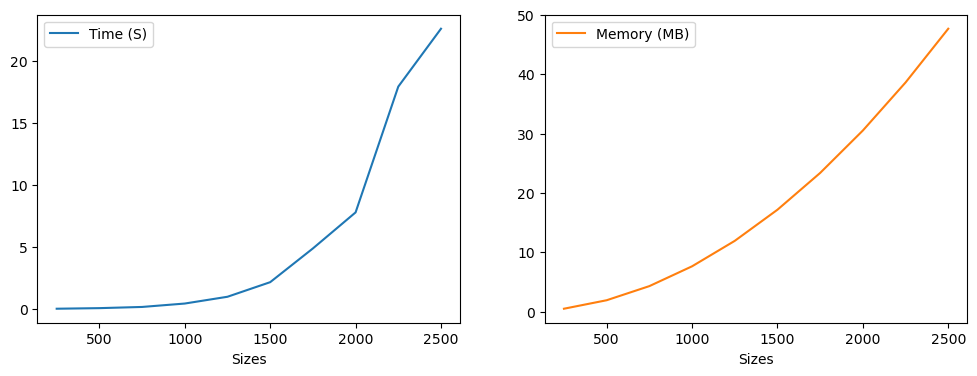

In [27]:
# Resource: https://pandas.pydata.org/docs/user_guide/visualization.html
results = {'Sizes': size_ls,
           'Time (S)': time_ls,
           'Memory (MB)': memory_ls}

results = pd.DataFrame(results)
results.set_index('Sizes', inplace=True)
results.plot(subplots=True, layout=(1, 2), figsize=(12, 4))

## Task 2.2 - Sorting
### Selection Sort
- Objective is to investigate the time and space needed for "sorting an unordered list of integers inefficiently by searching for the smallest element, then the next smallest"
- For this task, I'll use the **Selection Sort** method which divides the list into 2 parts, the sorted part on the left and the unsorted part on the right. Time complexity is O(n^2) (quadratic time complexity) and space is complexity of O(1) for Selection Sort algorithm
- https://www.geeksforgeeks.org/time-and-space-complexity-analysis-of-selection-sort/
- https://www.studysmarter.co.uk/explanations/computer-science/algorithms-in-computer-science/selection-sort/#:~:text=Selection%20Sort%20has%20a%20time,the%20size%20of%20the%20input.

### V1 - Original (with comments)

In [28]:
# https://www.youtube.com/watch?v=ee80YmiaSVQ

def selection_sort(arr):
    for i in range(0, len(arr) - 1): # -1 to exclude last element - nothing to compare to
        cur_min = i # Initialize default value to do comparisons
        for j in range(i + 1, len(arr)): # i+1 to do comparisons on unsorted sub-list
            if arr[j] < arr[cur_min]: # if j < cur_min, set cur_min = j
                cur_min = j
        
        # This approach uses a temporary variable temp to hold the value of arr[i], 
        # then assigns the value of arr[cur_min] to arr[i], and finally assigns 
        # the value of temp to arr[cur_min] --> i.e. swapping
        temp = arr[i]
        arr[i] = arr[cur_min]
        arr[cur_min] = temp
        
        # This code also works!!!
        #arr[i], arr[cur_min] = arr[cur_min], arr[i] # swap
        
    return(arr)

In [29]:
arr = [17, 4, 12, 19, 13, 9, 2, 22, 16, 1, 7, 20, 3]
arr

[17, 4, 12, 19, 13, 9, 2, 22, 16, 1, 7, 20, 3]

In [30]:
print('Unsorted array:', arr)
print('Sorted array:', selection_sort(arr))

Unsorted array: [17, 4, 12, 19, 13, 9, 2, 22, 16, 1, 7, 20, 3]
Sorted array: [1, 2, 3, 4, 7, 9, 12, 13, 16, 17, 19, 20, 22]


### V2 - Class
- Consider **not** going through with a class since I will need to use `investigate_time_and_space` function for the 3 other tasks repeatedly. Or potentially do go though with it since you need to instantiate `self.selection_sort_final()` inside the class

In [31]:
class SelectionSort:
    def __init__(self, size):
        self.size = size

    def run_selection_sort(self):
        """
        Generates a random array of integers with the specified size,
        then sorts it using the selection sort algorithm.
        """
        random_array = np.random.randint(low=0, high=100, size=self.size, dtype=int)
        
        for i in range(0, len(random_array) - 1):
            cur_min = i
            for j in range(i + 1, len(random_array)):
                if random_array[j] < random_array[cur_min]:
                    cur_min = j
                    
            temp = random_array[i]
            random_array[i] = random_array[cur_min]
            random_array[cur_min] = temp
        
        return random_array

    def get_time_and_space(self):
        """
        Investigates the time and space needed for the selection_sort function.
        """
        # Measure time taken
        start_time = time.time()
        self.run_selection_sort()
        end_time = time.time()
        time_taken = end_time - start_time
        
        # Measure space usage
        memory_usage = sys.getsizeof(self.run_selection_sort())
        
        return time_taken, memory_usage

In [32]:
example = SelectionSort(10)

In [33]:
example.run_selection_sort()

array([ 7, 17, 21, 32, 46, 73, 76, 77, 86, 90])

In [34]:
example.get_time_and_space()

(9.393692016601562e-05, 192)

In [35]:
# Example usage:
sizes = [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000]

size_ls = []
time_ls = []
memory_ls = []

for size in sizes:
    # Instantiate class and call time_and_space() for the given sizes
    sorter = SelectionSort(size)
    time_taken, memory_usage = sorter.get_time_and_space()

    print(f'Size: {size}')
    print(f'Time taken: {time_taken:.5f} seconds')
    print(f'Memory usage: {memory_usage / (1024 * 1024):.2f} MB \n') # (1024 * 1024) to convert to MB
    
    # Append results
    size_ls.append(size)
    time_ls.append(time_taken)
    memory_ls.append(memory_usage)

Size: 5000
Time taken: 1.08370 seconds
Memory usage: 0.04 MB 

Size: 10000
Time taken: 4.40057 seconds
Memory usage: 0.08 MB 

Size: 15000
Time taken: 9.93018 seconds
Memory usage: 0.11 MB 

Size: 20000
Time taken: 17.18827 seconds
Memory usage: 0.15 MB 

Size: 25000
Time taken: 26.00705 seconds
Memory usage: 0.19 MB 

Size: 30000
Time taken: 39.57150 seconds
Memory usage: 0.23 MB 

Size: 35000
Time taken: 54.79031 seconds
Memory usage: 0.27 MB 

Size: 40000
Time taken: 66.39770 seconds
Memory usage: 0.31 MB 



In [36]:
time_ls = [round(i, 5) for i in time_ls]
memory_ls = [round(i / (1024 * 1024), 2) for i in memory_ls] # Divide by 1024 * 1024 to convert to MB

print(size_ls)
print(time_ls)
print(memory_ls)

[5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000]
[1.0837, 4.40057, 9.93018, 17.18827, 26.00705, 39.5715, 54.79031, 66.3977]
[0.04, 0.08, 0.11, 0.15, 0.19, 0.23, 0.27, 0.31]


array([[<Axes: xlabel='Sizes'>, <Axes: xlabel='Sizes'>]], dtype=object)

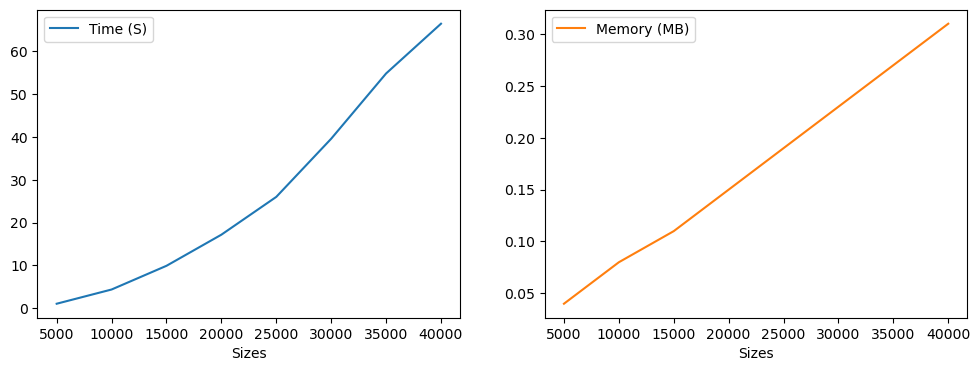

In [37]:
# Resource: https://pandas.pydata.org/docs/user_guide/visualization.html
results = {'Sizes': size_ls,
           'Time (S)': time_ls,
           'Memory (MB)': memory_ls}

results = pd.DataFrame(results)
results.set_index('Sizes', inplace=True)
results.plot(subplots=True, layout=(1, 2), figsize=(12, 4))

Finding Execution Times of Python Code & Scripts
https://www.youtube.com/watch?v=99gvqZ-xEgo

## Task 2.3 - Sub-strings
### Reconstruct Python's `Find()`
- Objective is to investigate the time and space needed for "a comparison of Python's find() method and your loop‑based implementation of a method that checks if one string is a substring of another"

In [38]:
chars_ls = list('abcdefghijklmnopqrstuvwxyz')
chars = np.array(chars_ls)

class Find_Substring:
    def __init__(self, size):
        self.size = size
        
    def run_find_substring(self):
        
        # Could possibly keep these 2 lines outside find_substring_index() function --> same as selection_sort
        # def find_substring_index(string, substring)
        string = ''.join(np.random.choice(chars, size=self.size))
        substring = ''.join(np.random.choice(chars, size=2))
    
        for i in range(len(string)):
            if string[i:i + len(substring)] == substring:
                return i
        return 'Not found'
    
    def get_time_and_space(self):
        """
        Investigates the time and space needed for the find_substring_index2 function.
        """
        # Measure time taken
        start_time = time.time()
        self.run_find_substring()
        end_time = time.time()
        time_taken = end_time - start_time
        
        # Measure space usage
        memory_usage = sys.getsizeof(self.run_find_substring())
        
        return time_taken, memory_usage

In [39]:
example = Find_Substring(1000)

In [40]:
example.run_find_substring()

462

In [41]:
example.get_time_and_space()

(0.0015139579772949219, 28)

In [42]:
# Example usage:
sizes = [10000000, 20000000, 30000000, 40000000, 50000000, 60000000, 70000000, 80000000]

size_ls = []
time_ls = []
memory_ls = []

for size in sizes:
    # Instantiate class and call get_time_and_space() for the given sizes
    find_substring = Find_Substring(size)
    time_taken, memory_usage = find_substring.get_time_and_space()
    
    print(f'Size: {size}')
    print(f'Time taken: {time_taken:.2f} seconds')
    print('Memory usage:', memory_usage, '\n')
    
    # Append results
    size_ls.append(size)
    time_ls.append(time_taken)
    memory_ls.append(memory_usage)

Size: 10000000
Time taken: 1.67 seconds
Memory usage: 28 

Size: 20000000
Time taken: 3.52 seconds
Memory usage: 28 

Size: 30000000
Time taken: 5.38 seconds
Memory usage: 28 

Size: 40000000
Time taken: 7.32 seconds
Memory usage: 28 

Size: 50000000
Time taken: 9.38 seconds
Memory usage: 28 

Size: 60000000
Time taken: 11.29 seconds
Memory usage: 28 

Size: 70000000
Time taken: 13.61 seconds
Memory usage: 28 

Size: 80000000
Time taken: 15.77 seconds
Memory usage: 28 



In [43]:
time_ls = [round(i, 2) for i in time_ls]
time_ls

[1.67, 3.52, 5.38, 7.32, 9.38, 11.29, 13.61, 15.77]

array([[<Axes: xlabel='Sizes'>, <Axes: xlabel='Sizes'>]], dtype=object)

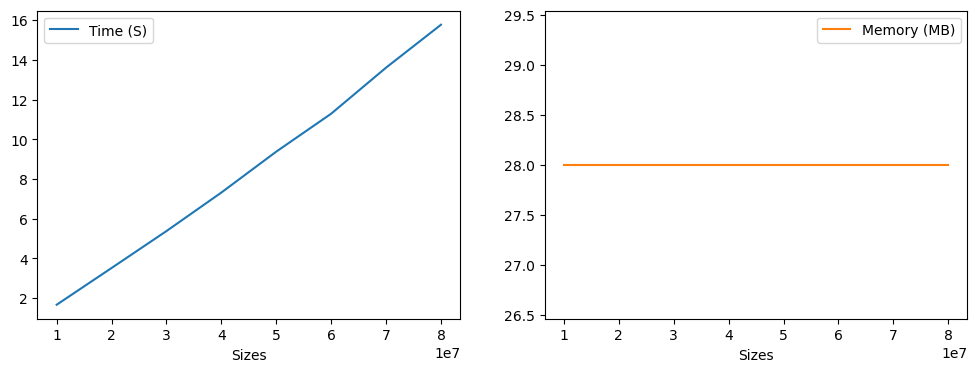

In [44]:
# Resource: https://pandas.pydata.org/docs/user_guide/visualization.html
results = {'Sizes': size_ls,
           'Time (S)': time_ls,
           'Memory (MB)': memory_ls}

results = pd.DataFrame(results)
results.set_index('Sizes', inplace=True)
results.plot(subplots=True, layout=(1, 2), figsize=(12, 4))